# iNeuron NBA Data Analysis Project

## Importing dependencies

In [2]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=4a881469598436539db6be85e4cc6078e2b44c93624e56779a096b99063149ea
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.figure_factory as ff
from sklearn.impute import SimpleImputer
%matplotlib inline

## Reading data

In [27]:
df1 = pd.read_csv("/2012_nba_draft_combine.csv")
df2 = pd.read_csv("/2013_nba_draft_combine.csv")
df3 = pd.read_csv("/2014_nba_draft_combine.csv")
df4 = pd.read_csv("/2015_nba_draft_combine.csv")
df5 = pd.read_csv("/2016_nba_draft_combine.csv")

In [28]:
# concatenating all the dataframes into a single dataframe
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True,axis=0)

In [29]:
# display first three rows
df.head(3)

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Andre Drummond,2012,9.0,81.75,83.75,90.25,109.5,33.5,143.0,31.5,141.0,279.0,7.5,9.5,9.50,10.0,10.83,3.39
1,1,Andrew Nicholson,2012,19.0,80.50,81.50,88.00,107.0,30.5,137.5,28.5,135.5,234.0,7.6,10.0,10.75,10.0,11.89,3.67
2,2,Anthony Davis,2012,1.0,81.25,82.50,89.50,108.0,NaN,NaN,NaN,NaN,222.0,7.9,9.0,8.50,NaN,NaN,NaN


In [30]:
# removing Unnamed: 0 column
df = df.drop("Unnamed: 0", axis=1)
df.head(1)

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Andre Drummond,2012,9.0,81.75,83.75,90.25,109.5,33.5,143.0,31.5,141.0,279.0,7.5,9.5,9.5,10.0,10.83,3.39


In [31]:
# check the shape of dataframe
df.shape

(306, 18)

## Data Cleaning

### Handling missing values

In [32]:
# creating imputer classes to fill na values

# mean imputer 
imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# median imputer
imputer_median = SimpleImputer(missing_values = np.nan, strategy = 'median')

# mode imputer
imputer_mode= SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [33]:
# printing information about dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    306 non-null    object 
 1   Year                      306 non-null    int64  
 2   Draft pick                215 non-null    float64
 3   Height (No Shoes)         306 non-null    float64
 4   Height (With Shoes)       306 non-null    float64
 5   Wingspan                  306 non-null    float64
 6   Standing reach            306 non-null    float64
 7   Vertical (Max)            257 non-null    float64
 8   Vertical (Max Reach)      257 non-null    float64
 9   Vertical (No Step)        258 non-null    float64
 10  Vertical (No Step Reach)  258 non-null    float64
 11  Weight                    305 non-null    float64
 12  Body Fat                  305 non-null    float64
 13  Hand (Length)             306 non-null    float64
 14  Hand (Widt

In [34]:
# finding number of null values
df.isnull().sum()

Player                        0
Year                          0
Draft pick                   91
Height (No Shoes)             0
Height (With Shoes)           0
Wingspan                      0
Standing reach                0
Vertical (Max)               49
Vertical (Max Reach)         49
Vertical (No Step)           48
Vertical (No Step Reach)     48
Weight                        1
Body Fat                      1
Hand (Length)                 0
Hand (Width)                  0
Bench                       157
Agility                      52
Sprint                       53
dtype: int64

### Columns with Null value
Draft Pick, Vertical(max), Vertical(max reach), Vertical(no step), Vertical(no step reach), weight, body fat, bench, agility, sprint
                                   

#### Draft Pick column

In [35]:
df["Draft pick"].unique()

array([ 9., 19.,  1., 27., 10., 33.,  3.,  6., 55., 46.,  4., 42., 35.,
       nan, 22., 30.,  7., 34., 24., 21., 31., 12., 14., 23., 13., 47.,
       39., 44., 51., 49., 59., 29., 11.,  2., 43., 26., 15., 36., 28.,
       37., 38., 58., 16., 18.,  8.,  5., 32., 25., 17., 41., 40., 53.,
       50., 52., 56., 48., 20., 60., 45., 54.])

In [36]:
df["Draft pick"].describe(include="all")

count    215.000000
mean      29.000000
std       16.127413
min        1.000000
25%       15.000000
50%       29.000000
75%       42.000000
max       60.000000
Name: Draft pick, dtype: float64

In [37]:
plt.style.use('dark_background')

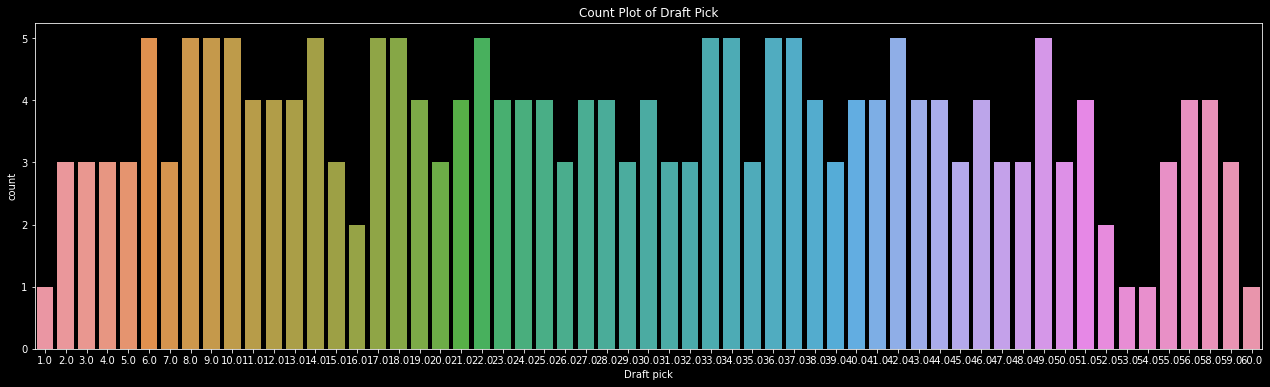

In [38]:
plt.figure(figsize=(22,6))
sns.countplot(data = df, x = "Draft pick")
plt.title("Count Plot of Draft Pick")
plt.show()

In [39]:
# applying mean imputer to draft pick column
df["Draft pick"] = imputer_mean.fit_transform(np.array(df["Draft pick"]).reshape(-1,1))

In [40]:
df["Draft pick"].isnull().sum().any()

False

In [41]:
df["Draft pick"] = df["Draft pick"].astype(int)

### Vertical (max) Column

In [42]:
df["Vertical (Max)"].unique()

array([33.5, 30.5,  nan, 37.5, 32.5, 39. , 39.5, 41.5, 37. , 33. , 34. ,
       31. , 29.5, 36.5, 34.5, 40. , 38. , 30. , 35. , 31.5, 40.5, 35.5,
       38.5, 36. , 42. , 32. , 29. , 41. , 44. , 43.5, 28.5, 25. , 43. ,
       28. ])

In [43]:
df["Vertical (Max)"].describe(include="all")

count    257.000000
mean      35.638132
std        3.595704
min       25.000000
25%       33.000000
50%       35.500000
75%       38.000000
max       44.000000
Name: Vertical (Max), dtype: float64

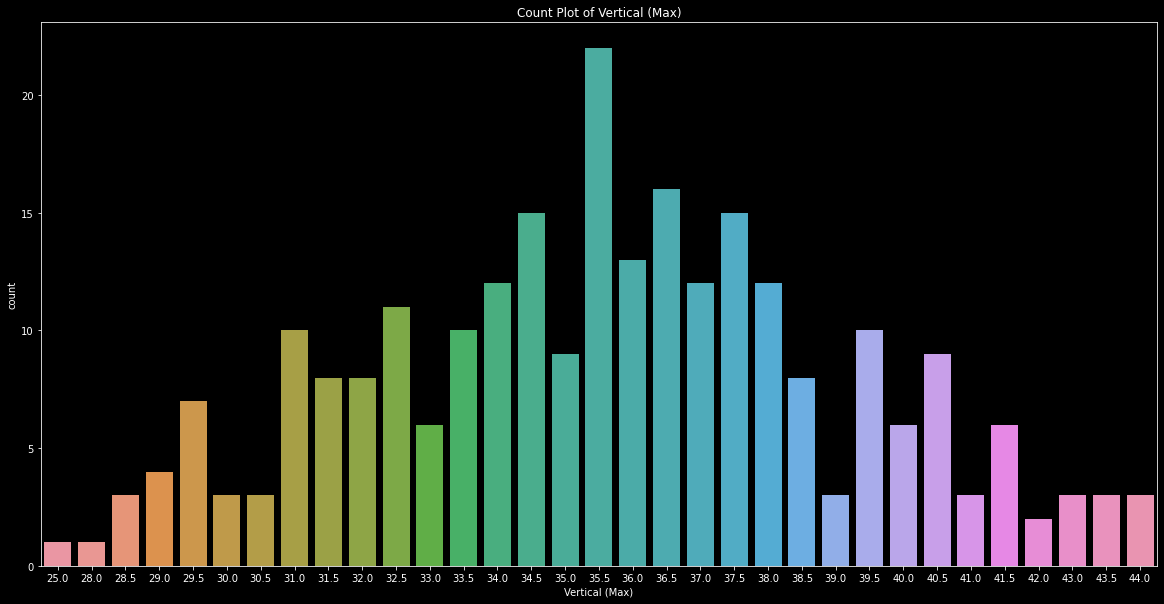

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = "Vertical (Max)")
plt.title("Count Plot of Vertical (Max)")
plt.show()

In [45]:
# applying mode imputer on "Vertical (Max)" column
df["Vertical (Max)"] = imputer_mode.fit_transform(np.array(df["Vertical (Max)"]).reshape(-1,1))
df["Vertical (Max)"].isnull().any()

False

In [46]:
fig = px.pie(df, values=df["Vertical (Max)"].value_counts(),names=df["Vertical (Max)"].unique())
fig.show(renderer="colab")

Above graph shows that 23.2% of the players which is 71 of 306 have a maximum vertical value of 33.5

### Vertical (Max reach) Column

In [47]:
df["Vertical (Max Reach)"].unique()

array([143. , 137.5,   nan, 144. , 134. , 141. , 139. , 135. , 138. ,
       132. , 141.5, 125.5, 136.5, 140. , 142. , 134.5, 129. , 133. ,
       135.5, 137. , 140.5, 146. , 139.5, 138.5, 145.5, 143.5, 127. ,
       129.5, 142.5, 145. , 136. , 144.5, 131.5, 130.5, 133.5, 126.5,
       128.5, 132.5, 127.5, 128. , 147. ])

In [48]:
df["Vertical (Max Reach)"].describe()

count    257.000000
mean     138.093385
std        4.220605
min      125.500000
25%      135.000000
50%      138.500000
75%      141.500000
max      147.000000
Name: Vertical (Max Reach), dtype: float64

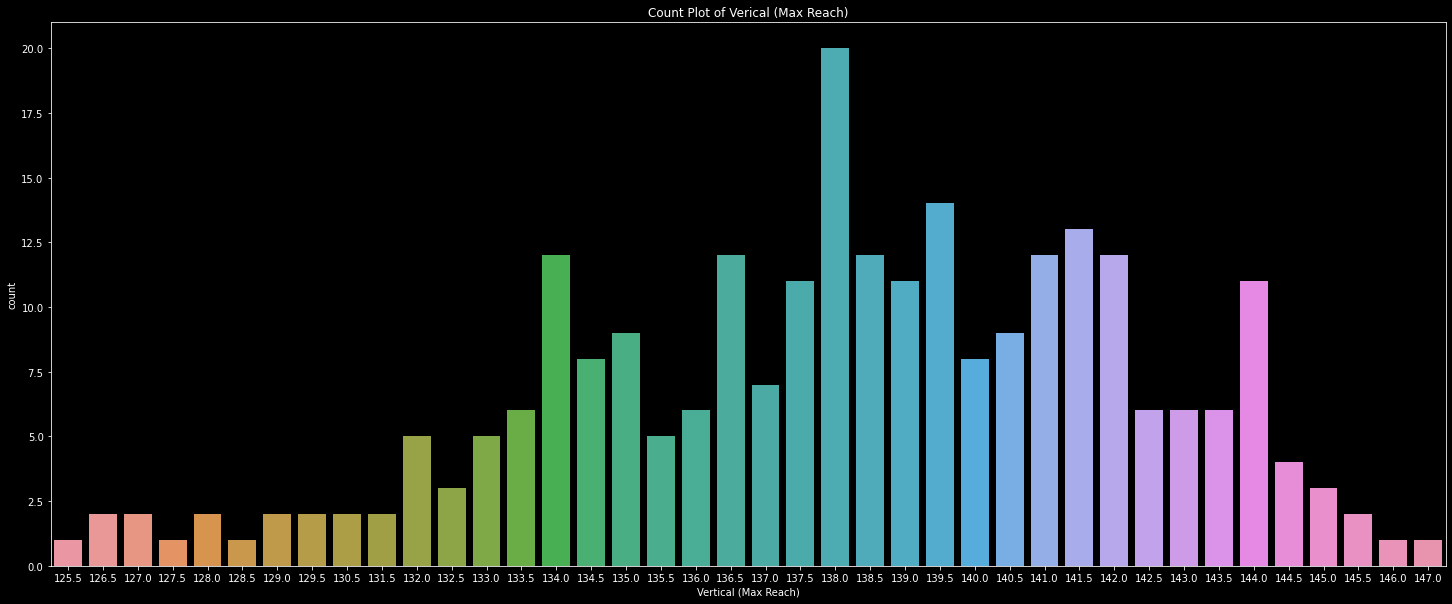

In [49]:
plt.figure(figsize=(25,10))
sns.countplot(data = df, x = "Vertical (Max Reach)")
plt.title("Count Plot of Verical (Max Reach)")
plt.show()

In [50]:
# applying mean imputer to ["Vertical (Max Reach)" column
df["Vertical (Max Reach)"] = imputer_mean.fit_transform(np.array(df["Vertical (Max Reach)"]).reshape(-1,1))

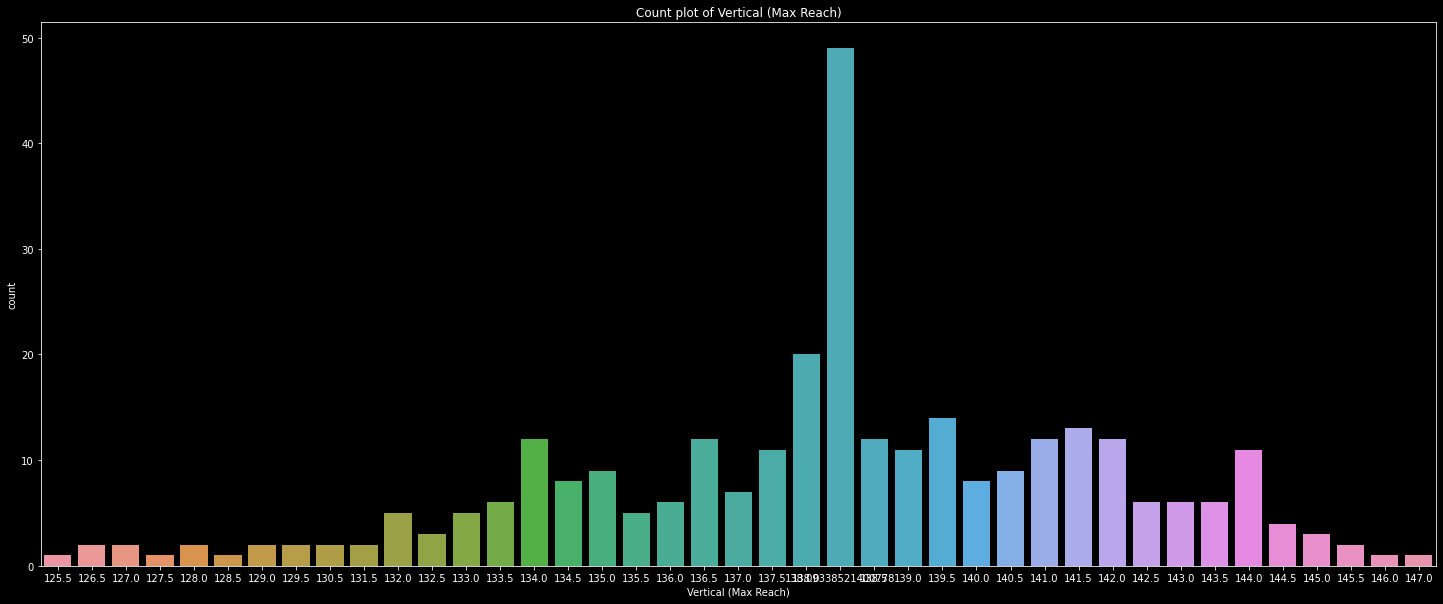

In [51]:
plt.figure(figsize=(25,10))
sns.countplot(data = df, x = "Vertical (Max Reach)")
plt.title("Count plot of Vertical (Max Reach)")
plt.show()

**When we use mean in place of nan values then the most frequent value is mean**

In [52]:
## by using mean in place of nan we have most frequent vale as mean

In [53]:
df["Vertical (Max Reach)"].isna().any()

False

#### Vertical (No Step Reach) Column

In [54]:
df["Vertical (No Step Reach)"].unique()

array([141. , 135.5,   nan, 140. , 129. , 138.5, 133. , 130. , 129.5,
       134. , 127.5, 132.5, 139.5, 142. , 134.5, 131. , 122. , 136. ,
       130.5, 135. , 133.5, 137.5, 128.5, 125.5, 127. , 138. , 128. ,
       136.5, 121.5, 131.5, 122.5, 132. , 137. , 141.5, 140.5, 126.5,
       125. , 124. , 123.5, 139. , 126. , 124.5, 121. , 143. , 119. ,
       142.5, 144. ])

In [55]:
df["Vertical (No Step Reach)"].value_counts()

131.0    15
134.5    14
133.0    14
132.5    12
132.0    10
129.0    10
135.0    10
136.0    10
131.5    10
129.5     9
138.0     9
128.0     8
133.5     8
135.5     8
137.0     8
134.0     7
127.5     6
136.5     6
130.0     6
138.5     6
137.5     6
128.5     6
140.0     6
127.0     6
130.5     5
126.5     5
139.0     4
139.5     4
125.5     3
124.5     3
123.5     3
121.0     2
124.0     2
125.0     2
141.0     2
140.5     2
122.5     2
141.5     1
121.5     1
126.0     1
122.0     1
142.0     1
143.0     1
119.0     1
142.5     1
144.0     1
Name: Vertical (No Step Reach), dtype: int64

In [56]:
df["Vertical (No Step Reach)"]=imputer_mean.fit_transform(np.array(df["Vertical (No Step Reach)"]).reshape(-1,1))

### Vertical (No step) Column

In [57]:
df["Vertical (No Step)"] = imputer_mean.fit_transform(np.array(df["Vertical (No Step)"]).reshape(-1,1))

### Weight and Body Fat Column

In [58]:
df["Weight"] = imputer_mean.fit_transform(np.array(df["Weight"]).reshape(-1,1))
df["Body Fat"] = imputer_mean.fit_transform(np.array(df["Body Fat"]).reshape(-1,1))

### Bench column
                                 

In [59]:
df["Bench"].describe()

count    149.000000
mean       9.463087
std        4.728470
min        1.000000
25%        6.000000
50%        9.000000
75%       13.000000
max       21.000000
Name: Bench, dtype: float64

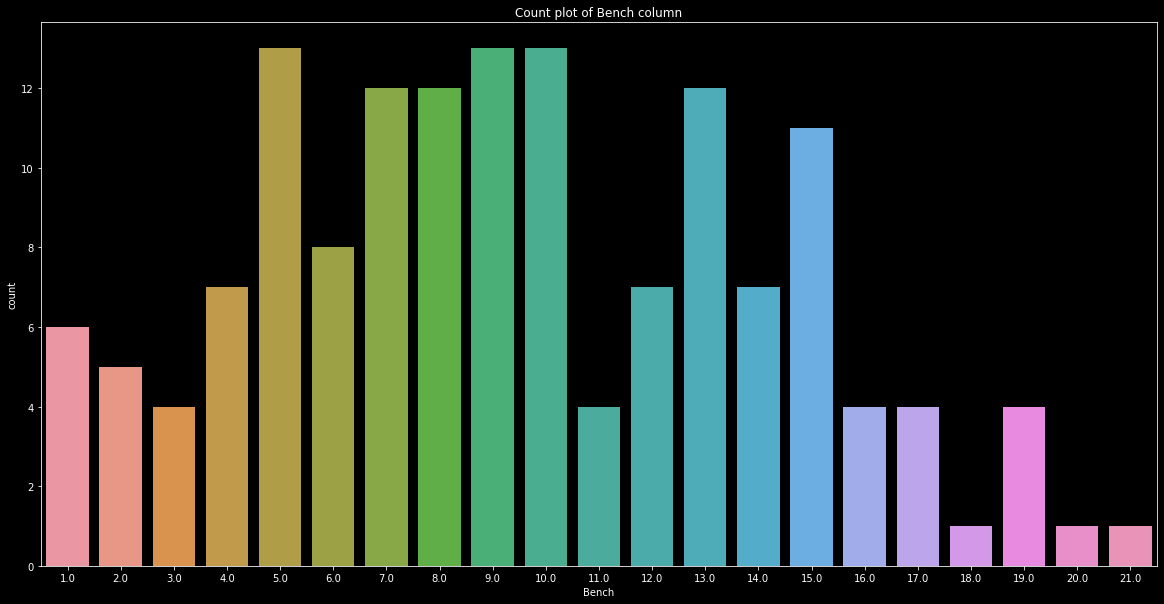

In [60]:
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = "Bench")
plt.title("Count plot of Bench column")
plt.show()

In [61]:
df["Bench"].isnull().sum()

157

In [62]:
# since 50% of this column contains null values hence we will drop this column
df = df.drop("Bench", axis=1)

### Agility and Sprint

In [63]:
df["Agility"].describe()

count    254.000000
mean      11.293307
std        0.547450
min       10.190000
25%       10.870000
50%       11.245000
75%       11.617500
max       12.940000
Name: Agility, dtype: float64

In [64]:
df["Agility"] = imputer_mean.fit_transform(np.array(df["Agility"]).reshape(-1,1))

In [65]:
df["Sprint"].describe()

count    253.000000
mean       3.322292
std        0.126877
min        3.020000
25%        3.240000
50%        3.300000
75%        3.400000
max        3.810000
Name: Sprint, dtype: float64

In [66]:
df["Sprint"] = imputer_mean.fit_transform(np.array(df["Sprint"]).reshape(-1,1))

In [67]:
df.head(3)

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
0,Andre Drummond,2012,9,81.75,83.75,90.25,109.5,33.5,143.000000,31.500000,141.000000,279.0,7.5,9.5,9.50,10.830000,3.390000
1,Andrew Nicholson,2012,19,80.50,81.50,88.00,107.0,30.5,137.500000,28.500000,135.500000,234.0,7.6,10.0,10.75,11.890000,3.670000
2,Anthony Davis,2012,1,81.25,82.50,89.50,108.0,35.5,138.093385,30.127907,132.614341,222.0,7.9,9.0,8.50,11.293307,3.322292


----------------------------------------------------------------------------------------------------------------------------------

## Statistical analysis on data

### Describing dataset

In [68]:
df.describe()

,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,2014.003268,29.000000,77.554739,78.837418,82.504085,102.781046,35.616013,138.093385,30.127907,132.614341,213.560656,7.118033,8.664542,9.208333,11.293307,3.322292
std,1.417683,13.508953,3.329769,3.316056,3.909764,4.906112,3.294621,3.866739,2.780364,4.268788,23.951120,2.411578,0.734083,1.251597,0.498603,0.115328
min,2012.000000,1.000000,68.250000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,-1.000000,-1.000000,10.190000,3.020000
25%,2013.000000,21.000000,75.250000,76.750000,79.812500,99.500000,34.000000,136.500000,28.500000,130.125000,196.000000,5.300000,8.350000,8.750000,10.960000,3.250000
50%,2014.000000,29.000000,77.500000,79.000000,82.750000,103.000000,35.500000,138.093385,30.127907,132.614341,212.500000,6.500000,8.750000,9.250000,11.293307,3.322292
75%,2015.000000,36.750000,79.937500,81.000000,85.750000,106.500000,37.500000,140.875000,32.000000,135.000000,232.000000,8.400000,9.000000,9.750000,11.550000,3.380000
max,2016.000000,60.000000,85.250000,86.250000,92.500000,115.000000,44.000000,147.000000,38.000000,144.000000,279.000000,16.300000,10.000000,11.750000,12.940000,3.810000


In [69]:
df.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Agility', 'Sprint'],
      dtype='object')

### Year wise player picking

In [70]:
fig = px.bar(df,x="Year",y="Draft pick")
fig.show(renderer = "colab")

- Every year the player picking goes high
- In 2016 the drafting is more as compared to 2012, 2013, 2014 and 2015

### Height without Shoes and Draft picking of player

In [71]:
fig = px.scatter(df, x = "Height (With Shoes)", y = "Draft pick", color = "Player")
fig.show(renderer = "colab")

- As the height Of player increases the draft picking is somehow constant

### Height with no shoes and with shoes 

In [72]:
fig = px.scatter(df, x = "Height (With Shoes)", y = "Height (No Shoes)", color = "Player")
fig.show(renderer = "colab")

**As the height without shoes increases the height with shoes also increases**

In [73]:
fig = px.box(df, y="Height (With Shoes)")
fig.show(renderer = "colab")

**There are two outliers as we can see in the above plot**

### Anaysing wingspan with height (with shoes)

In [74]:
fig = px.scatter(df, x = "Height (With Shoes)", y = "Wingspan", color="Player")
fig.show(renderer = "colab")

In [75]:
plt.style.use("seaborn-white")

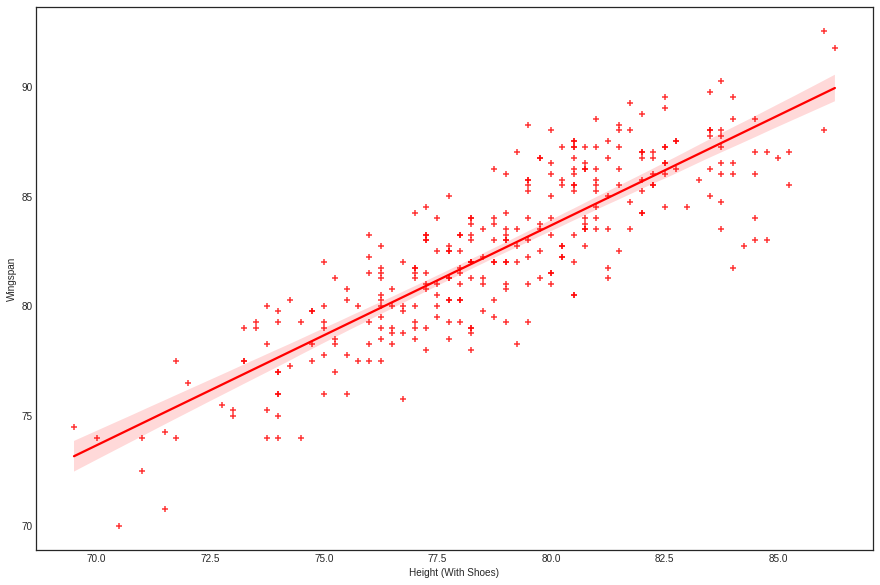

In [76]:
plt.figure(figsize=(15,10))
sns.regplot(x = "Height (With Shoes)", y = "Wingspan", data = df, scatter = True, fit_reg = True, color = "red", marker = "+")
plt.show()

Graph shows that the wingspan is linearly depending on height

### Height vs Weight

In [77]:
fig = px.scatter(df, x = "Height (With Shoes)", y = "Weight")
fig.show(renderer = "colab")

In [78]:
fig = px.box(df, y = "Weight")
fig.show(renderer = "colab")

- No outlier in weight column
- Also as the height of player increases the weight also increases

### Weight and Body Fat Analysis as per height

In [79]:
fig = px.scatter(df , y = "Body Fat", x = "Weight")
fig.show(renderer = "colab")

In [80]:
px.line(df , x = "Height (No Shoes)", y = ["Weight","Body Fat"], labels = {"x":"height", "y":"Weight and Fat"}, title = "Weight VS Body Fat")
fig.show(renderer = "colab")

- As the height is increasing the weight is also increasing
- On the other hand the body fat is somewhere Constant

In [81]:
df.columns 

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Agility', 'Sprint'],
      dtype='object')

### Agility 

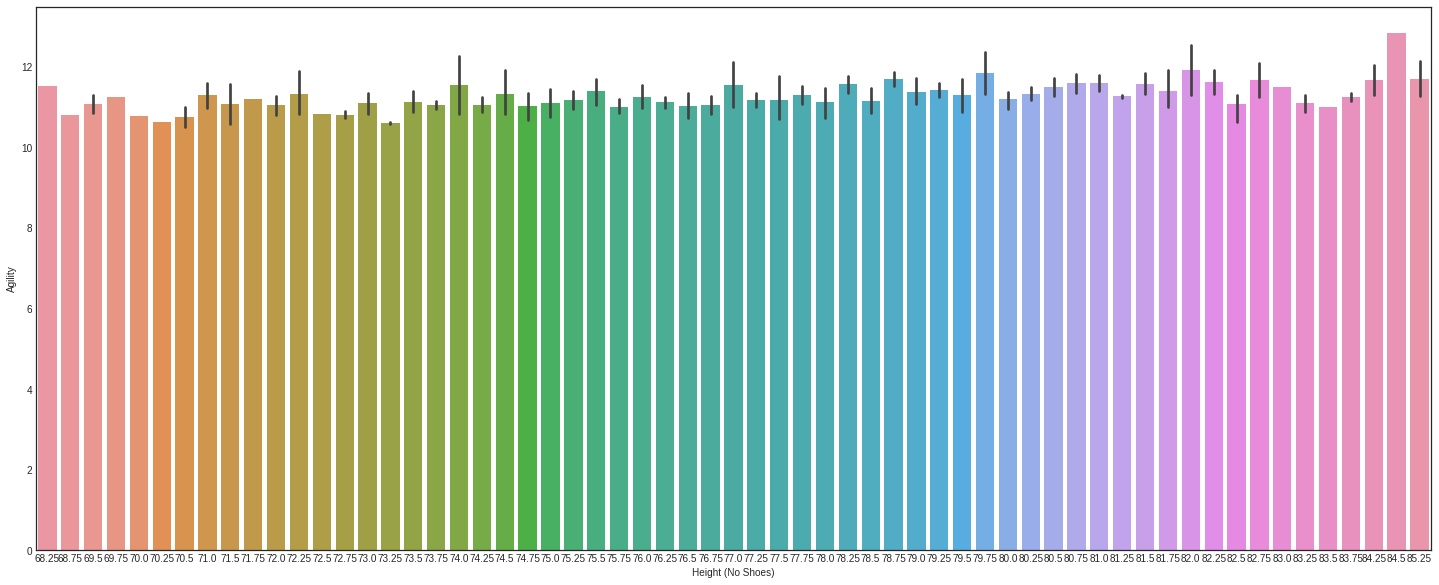

In [82]:
plt.figure(figsize=(25,10))
sns.barplot(x = "Height (No Shoes)", y = "Agility", data = df)
plt.show()

In [83]:
fig = px.scatter(df,x = "Height (No Shoes)", y = "Weight", size = "Agility", color = "Player")
fig.show(renderer = "colab")

- Graph shows that the agility is almost constant for every player 
- It does nt depend on height or Weight 
- So we can delete this column

In [84]:
new_df = df.drop("Agility", axis=1)

In [85]:
new_df.head(3)

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Sprint
0,Andre Drummond,2012,9,81.75,83.75,90.25,109.5,33.5,143.000000,31.500000,141.000000,279.0,7.5,9.5,9.50,3.390000
1,Andrew Nicholson,2012,19,80.50,81.50,88.00,107.0,30.5,137.500000,28.500000,135.500000,234.0,7.6,10.0,10.75,3.670000
2,Anthony Davis,2012,1,81.25,82.50,89.50,108.0,35.5,138.093385,30.127907,132.614341,222.0,7.9,9.0,8.50,3.322292


### Sprint Analysis

In [86]:
fig = px.scatter(new_df, x = "Height (No Shoes)", y = "Weight", size = "Sprint", color = "Player")
fig.show(renderer = "colab")

As height increases sprint also increases

In [87]:
fig = px.scatter(new_df, x= "Vertical (Max)", y = "Height (No Shoes)", color = "Player", size = "Sprint")
fig.show(renderer = "colab")

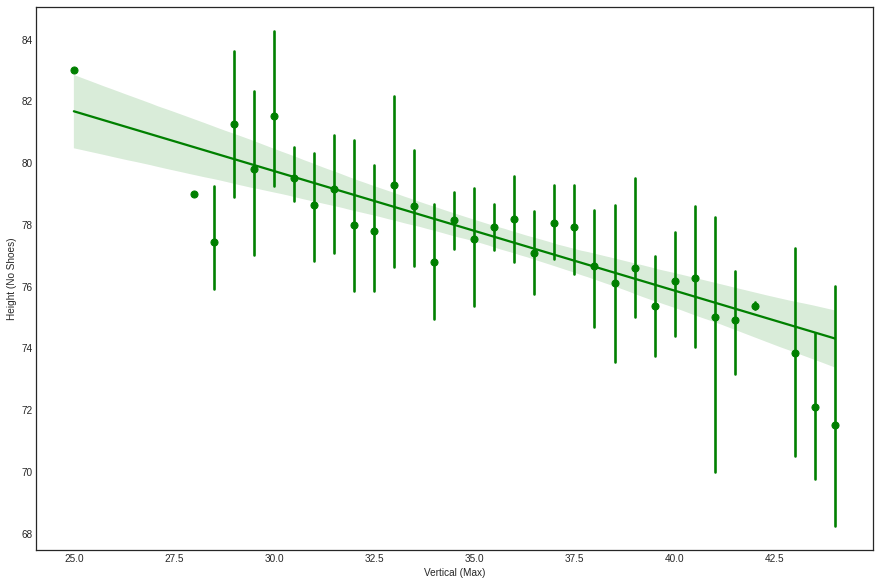

In [88]:
plt.figure(figsize=(15,10))
sns.regplot(x="Vertical (Max)", y= "Height (No Shoes)",data=df,scatter=True, fit_reg=True,color="green",x_estimator=np.mean)
plt.show()

<Figure size 864x864 with 0 Axes>

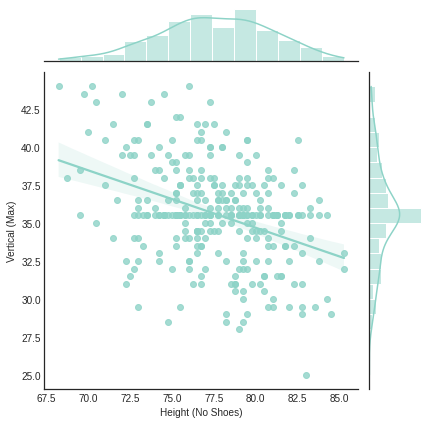

In [89]:
plt.figure(figsize=(12,12))
sns.jointplot(x = "Height (No Shoes)", y = "Vertical (Max)", data = new_df, kind="reg")
plt.show()

- Height having negative slope with vertical (max)
- Data diverges from the mean value
- Only one person having vertical max 25.0 is a outlier

### Relation between vertical (max) and vertical(max reach)

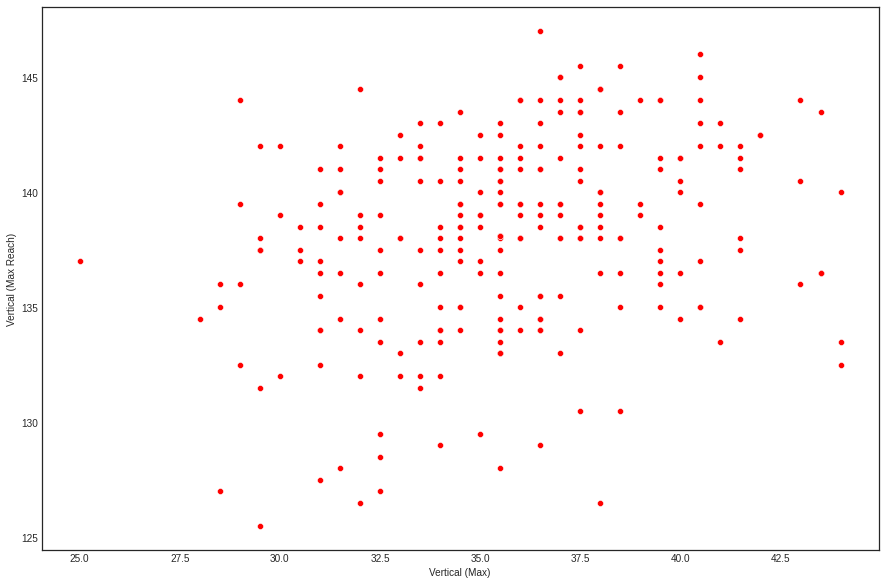

In [90]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = "Vertical (Max)", y = "Vertical (Max Reach)", data = new_df, color = "red")
plt.show()

- Most of the person are in range of 130 - 145 vertical max reach

### Relation Between Hand (Length) and Hand (Width) 

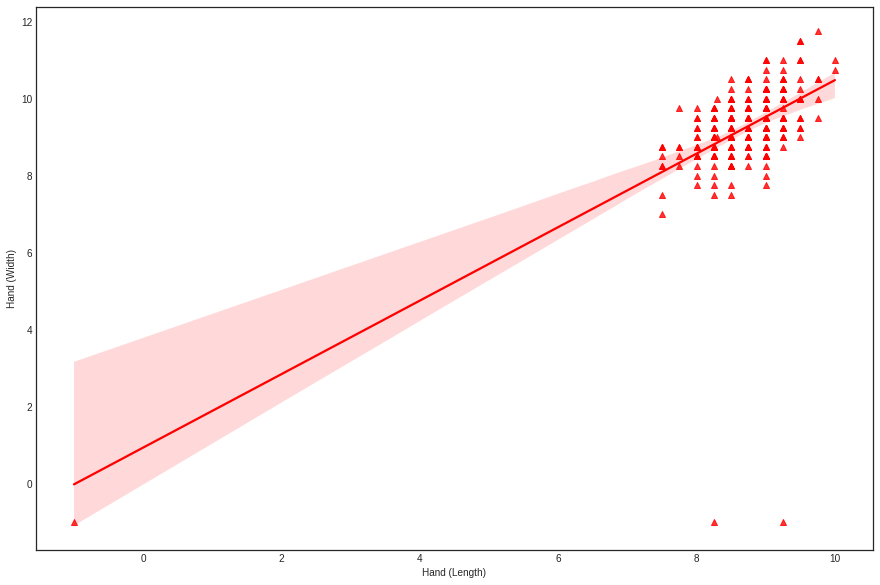

In [91]:
plt.figure(figsize=(15,10))
sns.regplot(x="Hand (Length)", y="Hand (Width)",data=new_df,fit_reg=True,scatter=True,color="red",marker="^")
plt.show()

- The hand length and hand width are linearly dependent on each other
- There are two outliers 

### Relation between wingspan with sum of hand width and length

In [92]:
new_df.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Sprint'],
      dtype='object')

In [93]:
fig = px.line(new_df,x="Hand (Length)",y="Wingspan")
fig.show(renderer = "colab")

One person is having hand length -1 which is not possible which means that the value collected for that person is mistakenly written to be -1

In [94]:
fig = px.line(df,x="Hand (Width)",y="Wingspan")
fig.show(renderer = "colab")

There are three person with hand width -1 (not possible)

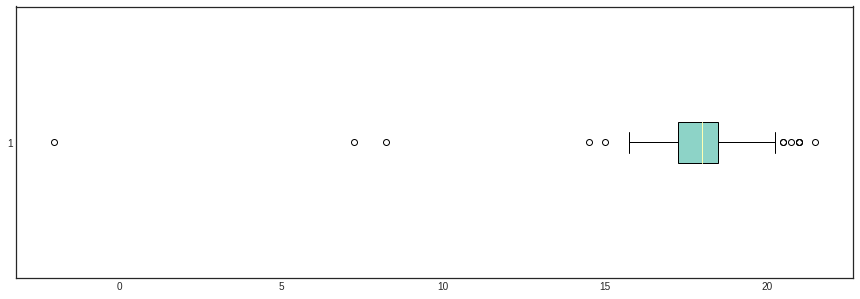

In [95]:
df1 = df["Hand (Length)"] + df["Hand (Width)"]
plt.figure(figsize=(15,5))
plt.boxplot(df1,vert=False,patch_artist=True)
plt.show()

- There are four cluster outliers 
- 3 below the lower extreme and 1 at upper extreme
- IQR is in between 16-21

### Weight with year

In [99]:
fig = px.line(new_df, x = "Year", y = "Weight")
fig.show(renderer = "colab")

- Weight increases during year 2012 and 2014
- And weigth decreases during years 2013 and 2015

## Body fat with years

In [100]:
fig = px.line(new_df, x = "Year", y = "Body Fat")
fig.show(renderer = "colab")

- Body Fat deacreases over the years

### Relation between Vertical Max hand( length ) and players

In [104]:
fig = px.scatter_3d(new_df, x = "Vertical (Max)", y = "Hand (Length)" , z = "Player", color="Player")
fig.show(renderer = "colab")

A player named Kris Dunn has hand length -1 at vertical (max) of 35.5

### Analysis Of sprint of players with year

In [105]:
fig = px.scatter_3d(new_df, x = "Year", y = "Sprint" , z = "Player", color="Player")
fig.show(renderer = "colab")

Sprint decreases as the year increases

### 3d scatter plot of wingspan and standing reach of players

In [106]:
fig = px.scatter_3d(new_df, x = "Wingspan", y = "Standing reach" , z = "Player", color="Player")
fig.show(renderer = "colab")

### Density plot of Year vs Sprint

<Figure size 1080x720 with 0 Axes>

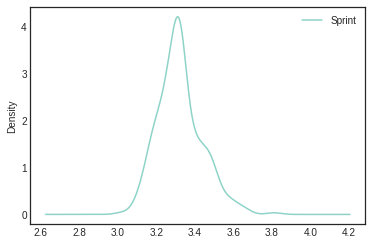

In [113]:
plt.figure(figsize=(15,10))
new_df.plot(kind="density", x = "Year", y = "Sprint")
plt.show()

### Violin Plot
Vertical (Max), Vertical (Max Reach), Vertical (No Step), Vertical (No Step Reach)

In [116]:
fig = px.violin(new_df,y=["Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"],box=True, points="all")
fig.show(renderer = "colab")

- The median value is somewhat same for Vertical (Max) and Vertical( No Step)
- The median value is somewhat same for Vertical (Max Reach) and Vertical( No  Step reach)

### Violin Plot
Hand (Width and Length)

In [117]:
fig = px.violin(new_df, y = ["Hand (Length)","Hand (Width)"], box = False, points="all")
fig.show(renderer = "colab")

1 outlier is present in both Hand Length and Width

## Empirical Commutative Distribution

In [118]:
fig = px.ecdf(new_df, x = ["Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"])
fig.show(renderer = "colab")

- The probablity  of Vertical (No Step) changes suddenly from 0.4 to 0.6 at value 30. 
- The probablity  of Vertical (Max) changes suddenly from 0.37 to 0.59 at value 35.5. 
- The probablity  of Vertical (No Step) changes suddenly from 0.4 to 0.5 at value 137. 
- The probablity  of Vertical (No Step ) changes suddenly from 0.4 to 0.6 at value 133.

In [119]:
fig = px.ecdf(new_df, x = ["Hand (Length)","Hand (Width)"])
fig.show(renderer = "colab")

The probablity  of player is 0 until the value of Hand (Width) and Hand(Length) is not > 8 

In [120]:
fig = px.bar(new_df, x= "Wingspan", y = "Standing reach")
fig.show(renderer = "colab")

Standing Reach is maximum at 82 wingspan

<Figure size 1080x720 with 0 Axes>

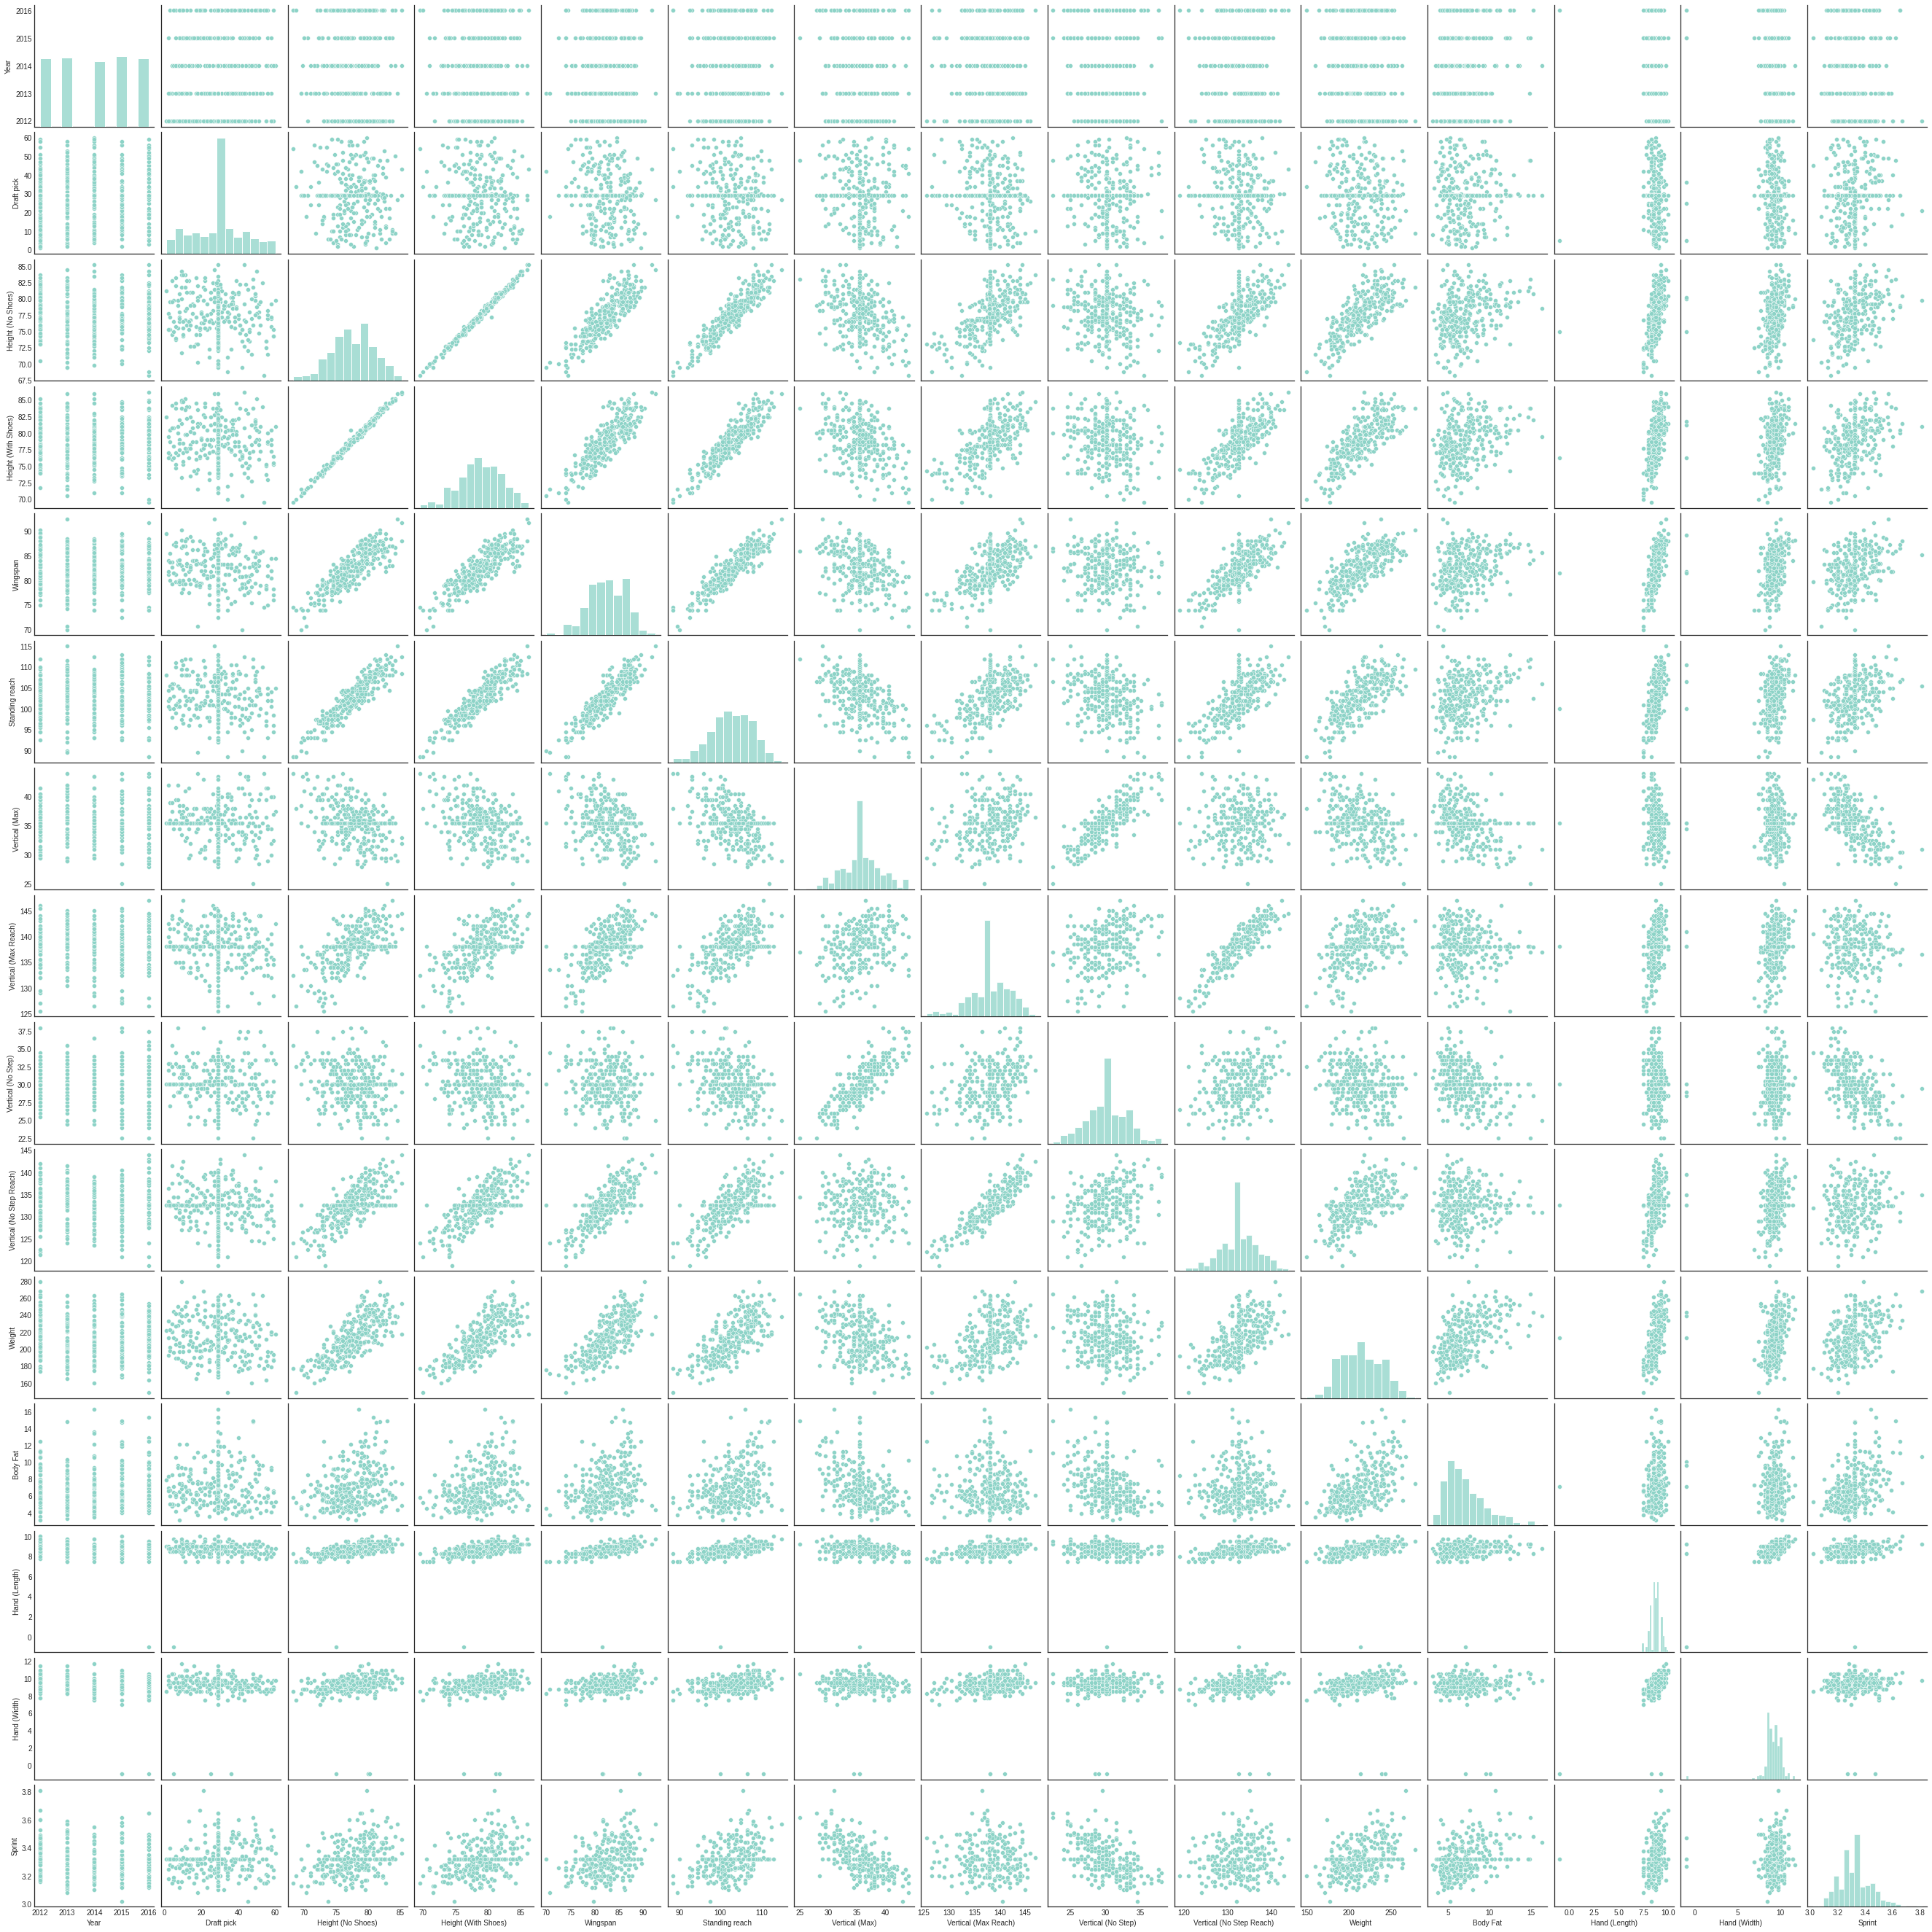

In [121]:
plt.figure(figsize=(15,10))
sns.pairplot(new_df)
plt.show()

## By : Chet Mani Singh